# Data Visualization and Exploration

1.	Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import math
heart_data= pd.read_csv("/content/drive/MyDrive/Sem-2/ML/framingham.csv")
heart_data.head(15)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
heart_data.shape

(4238, 16)

In [ ]:
print(heart_data.head(2))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   

   TenYearCHD  
0           0  
1           0  


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


2.	Comment on class imbalance with appropriate visualization method.

It is from an ongoing ongoing cardiovascular study on residents of the town of Framingham. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

3.	Provide appropriate visualizations to get an insight about the dataset.

In [ ]:
count=0
for i in heart_data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
heart_data.dropna(axis=0,inplace=True)

In [ ]:
# checking for missing values
heart_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

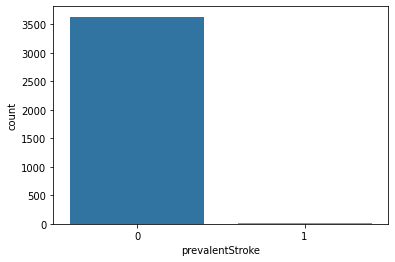

In [ ]:
sns.countplot(x="prevalentStroke", data=heart_data)
# prevalentStroke positiveness is less as per study

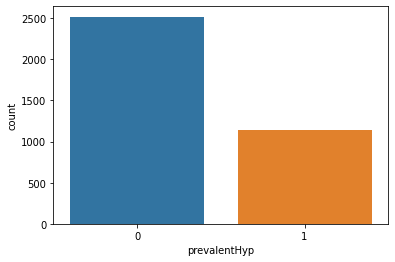

In [ ]:
sns.countplot(x="prevalentHyp", data=heart_data)
# prevalentHyp is approx. half of the possibility of positiveness.

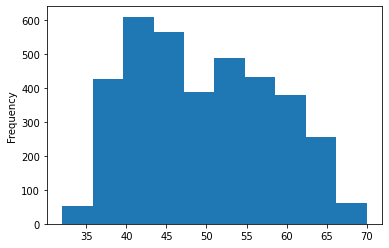

In [ ]:
heart_data["age"].plot.hist(x="Age")
# Peaople with age approx. 40 are having high risk of heart attack 

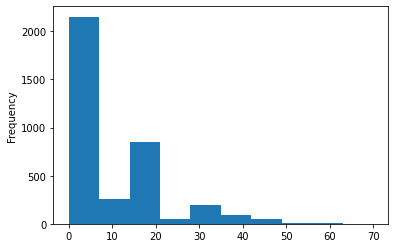

In [ ]:
heart_data["cigsPerDay"].plot.hist()
#People with smoking habit 0 to (approx.)8 is more

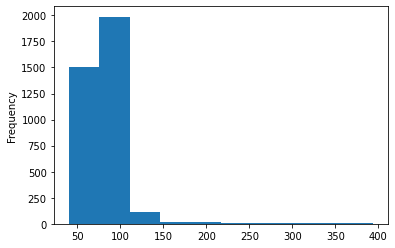

In [ ]:
heart_data["glucose"].plot.hist()
# Count of glucose mostly displays between 80 to 120

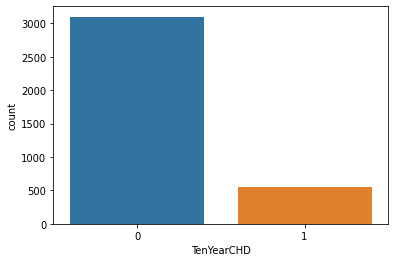

In [ ]:
sns.countplot(x="TenYearCHD", data=heart_data)
# Over 10 years of duration the risk of Coronary Heart disease

4.	Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer.

The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

**Demographic**: sex: male or female;(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioural**

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

**Medical( history)**:

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current):**

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

**Predict variable (desired target)**:

TenYearCHD: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

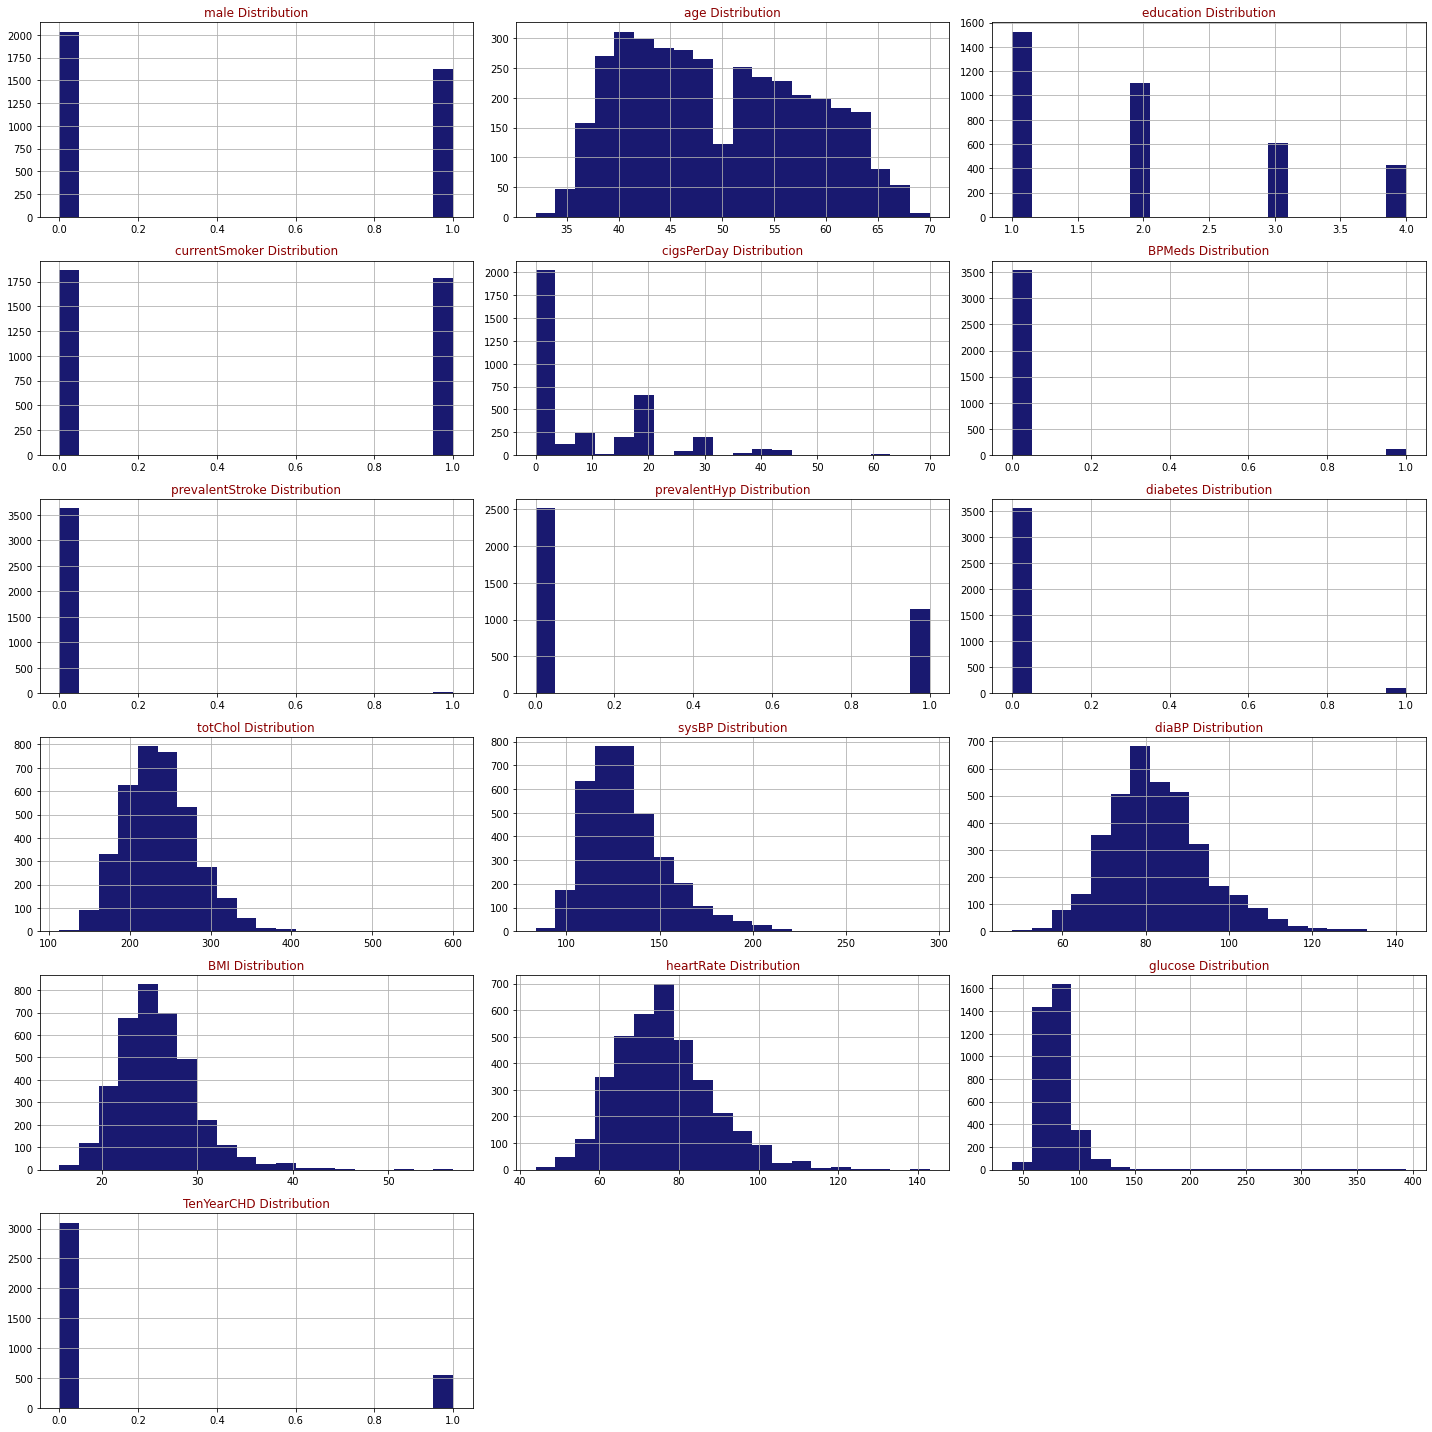

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_data,heart_data.columns,6,3)

In [ ]:
heart_data.TenYearCHD.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

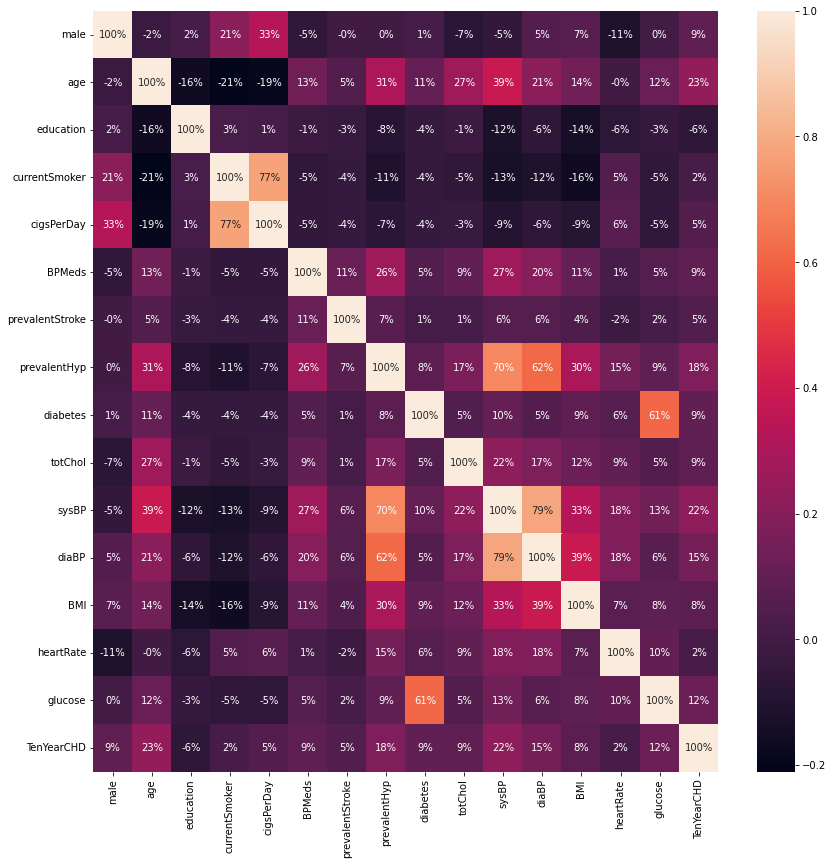

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(heart_data.corr(), annot=True, fmt='.0%')

Strong Correlations found

currentSmoker & cigPerDay - 77%

sysBP & diaBP - 79%

sysBP & prevalentHyp - 70%

diabetes & glucose - 61%





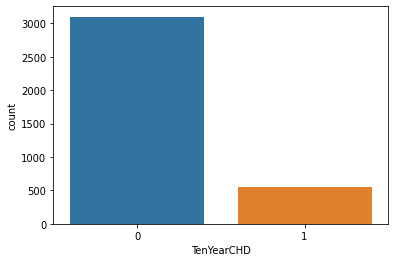

In [ ]:
sns.countplot(x='TenYearCHD',data=heart_data)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

5.	Any other visualization specific to the problem statement.

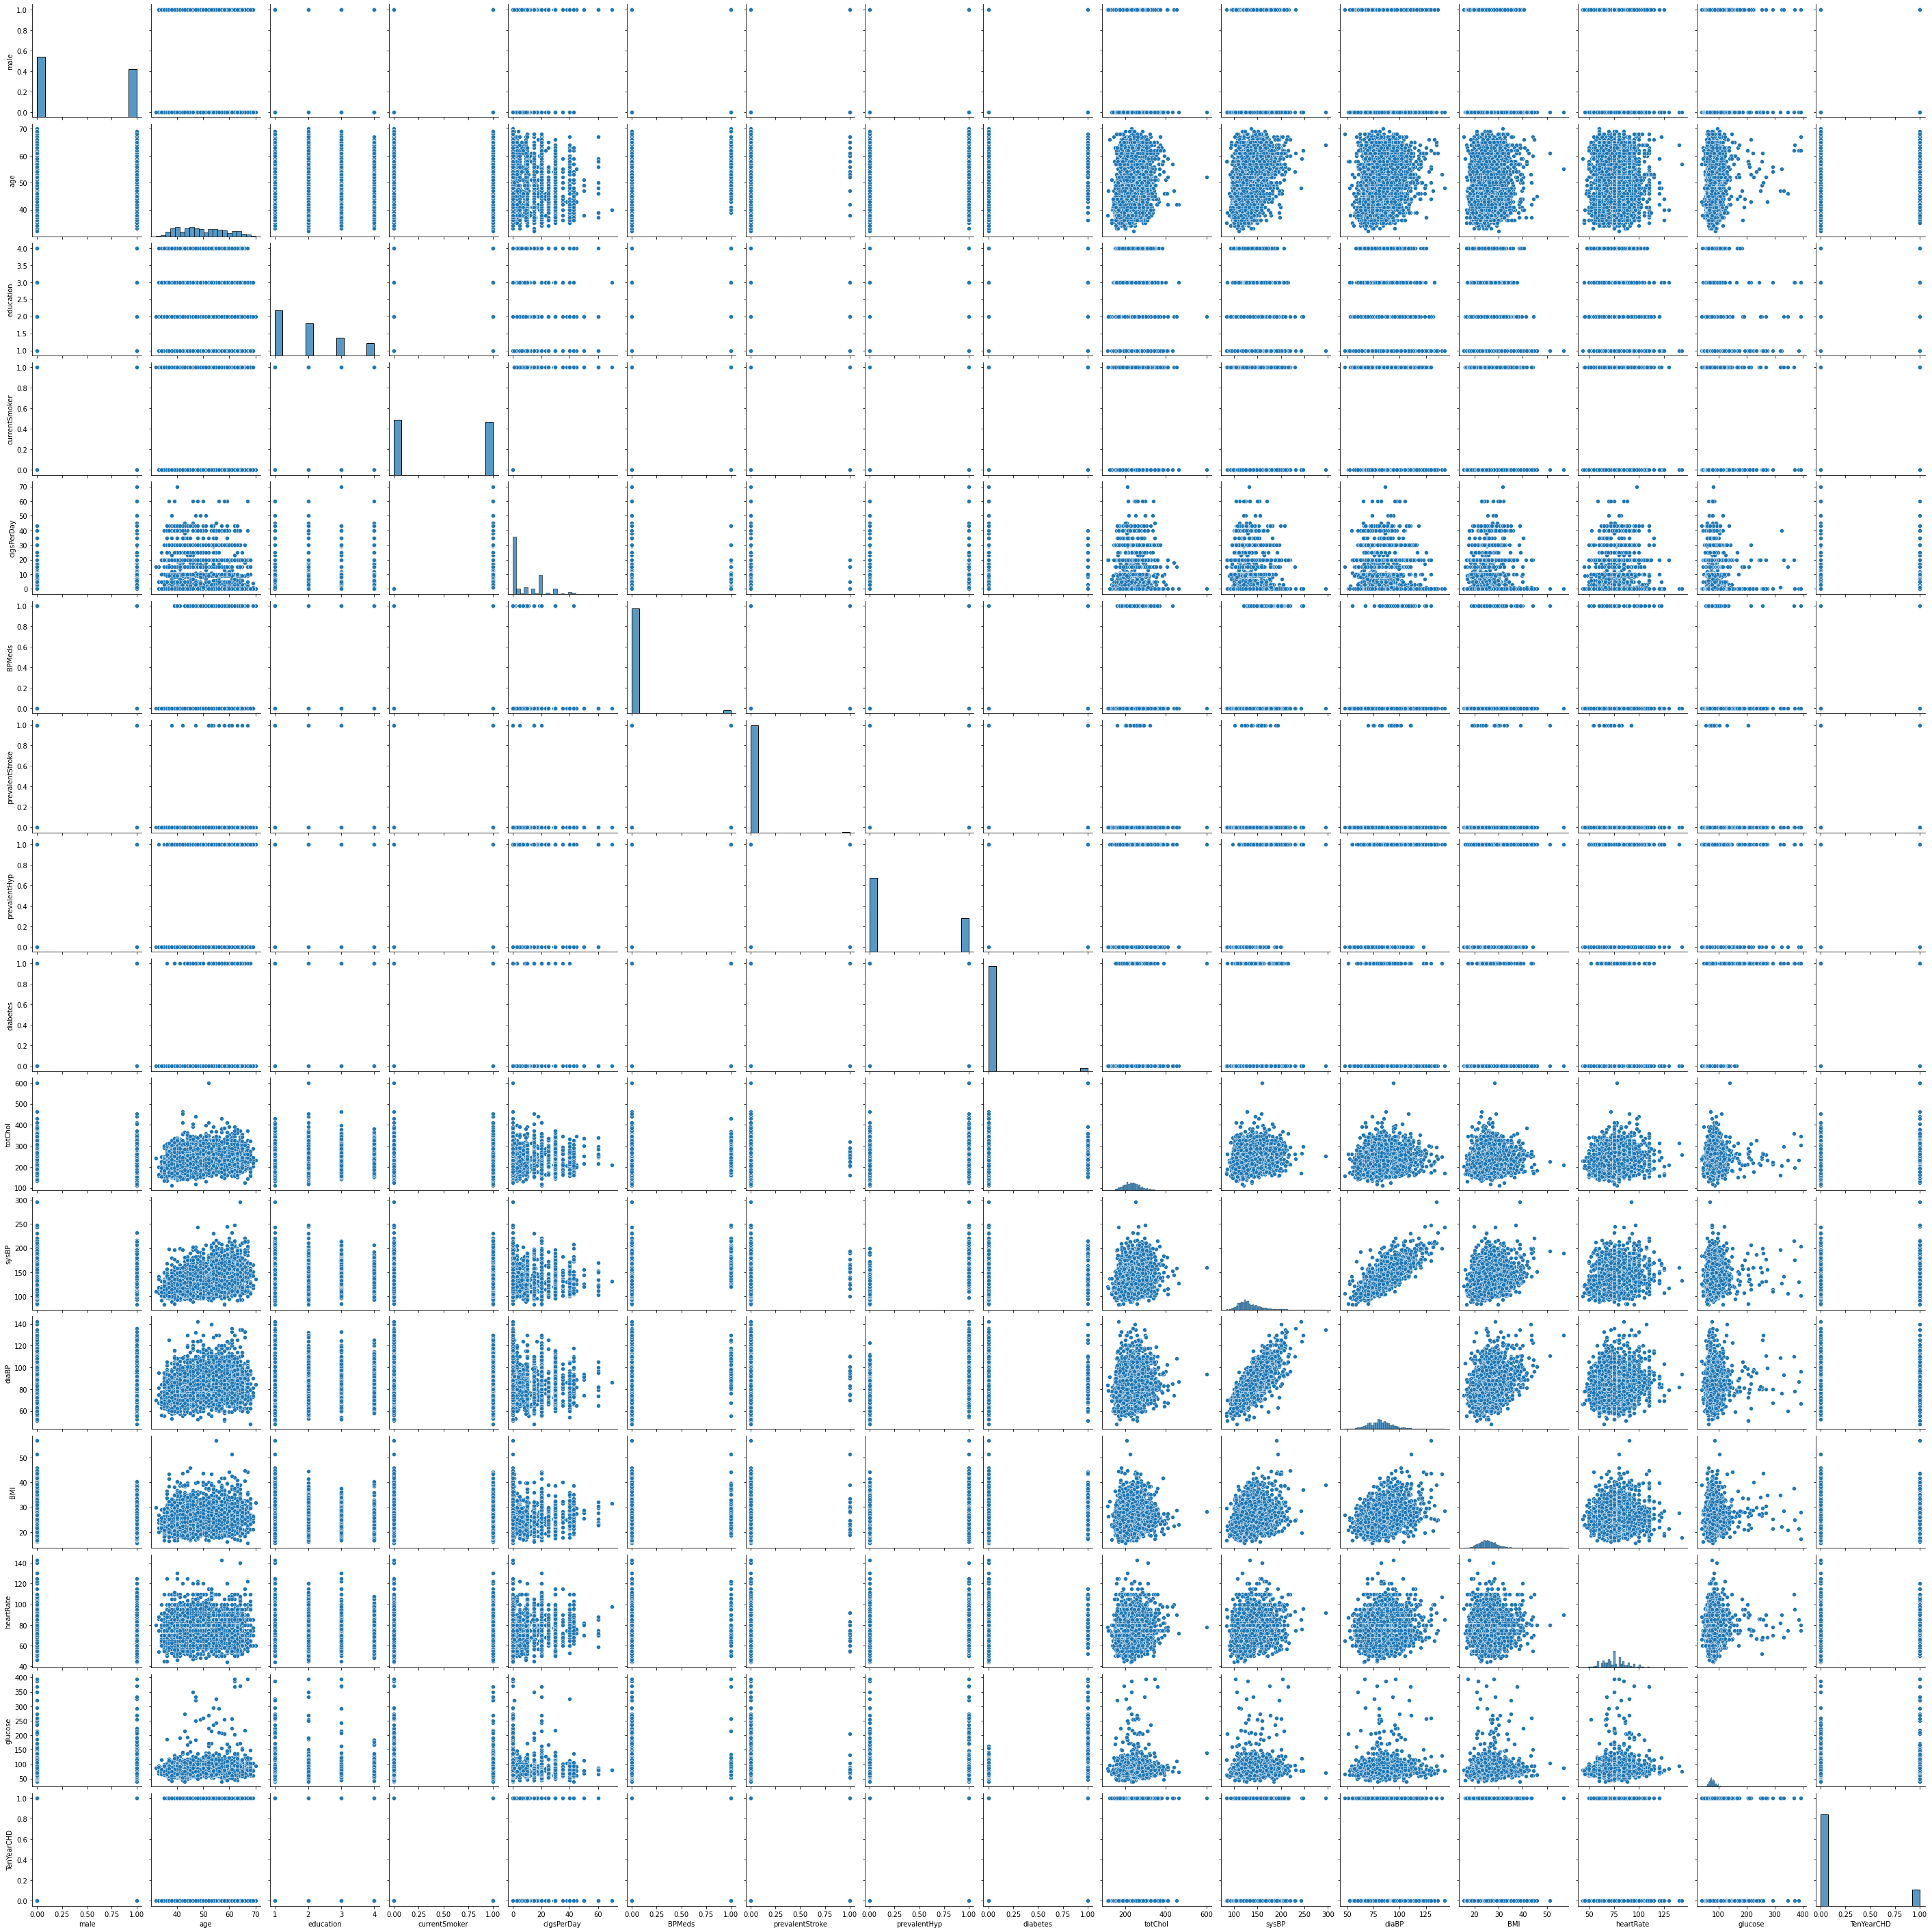

In [ ]:
sns.pairplot(data=heart_data)

# Data Pre-processing and cleaning

1.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters. 

In [ ]:
# NULL values have been already being checked and taken care
heart_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#plot of age vs. TenYearCHD
print(stats.binned_statistic(heart_data.heartRate, heart_data.TenYearCHD))

BinnedStatisticResult(statistic=array([0.09090909, 0.13276231, 0.16345271, 0.1450253 , 0.16058394,
       0.15319149, 0.21052632, 0.30769231, 0.        , 0.        ]), bin_edges=array([ 44. ,  53.9,  63.8,  73.7,  83.6,  93.5, 103.4, 113.3, 123.2,
       133.1, 143. ]), binnumber=array([4, 6, 4, ..., 3, 3, 4]))


Dropping Education column as it is outlier with respect to Chronic Heart Disease.

In [ ]:
heart_data.drop(['education'],axis=1,inplace=True)
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Class imbalance is when the number of samples is different for the different classes in the data. In real-world applications of machine learning, it’s very common to encounter datasets with various degrees of class imbalance: 

from moderate imbalance — 

E.g. medical reports where 10% are diagnosed with having a disease and 90% are not even total Chlestrol, System BP, Dia BP, HeartRate, etc. is high— 

to extreme imbalance — 

E.g. anomaly detection in an industrial plant, where perhaps 1 out of 10,000 TenYearCHD fails.

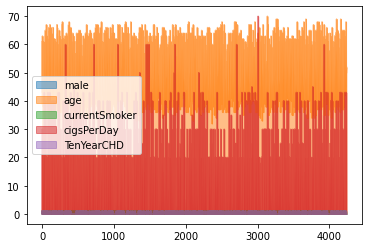

In [ ]:
df = pd.DataFrame(heart_data, columns=["male", "age", "currentSmoker", "cigsPerDay", "TenYearCHD"])
df.plot.area(stacked=False);

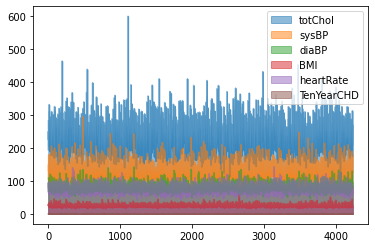

In [ ]:
df = pd.DataFrame(heart_data, columns=["totChol", "sysBP", "diaBP", "BMI", "heartRate", "TenYearCHD"])
df.plot.area(stacked=False);

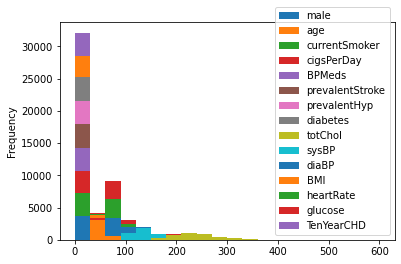

In [ ]:
heart_data.plot.hist(stacked=True, bins=20);

2.	Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Explore a few techniques for identifying feature importance for your feature engineering task. 

In [ ]:
from statsmodels.tools import add_constant as add_constant
heart_data_constant = add_constant(heart_data)
heart_data_constant.head()

In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_data_constant.columns[:-1]
model=sm.Logit(heart_data.TenYearCHD,heart_data_constant[cols])
result=model.fit()
result.summary()

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_data_constant,heart_data.TenYearCHD,cols)

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3649
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.1147
Time:                        13:53:37   Log-Likelihood:                -1381.2
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.885e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1298      0.476    -19.199      0.000     -10.062      -8.198
male           0.5614      0.107      5.255      0.000       0.352       0.771
age            0.0659      0.006     10.254      0.000       0.053       0.078
cigsPerDay     0.0192      0.004      4.604      0.000       0.011       0.027
totChol        0.0023      0.001      2.024      0.043    7.16e-05       0.004
sysBP          0.0175      0.002      8.159      0.000       0.013       0.022
glucose        0.0073      0.002      4.342      0.000       0.004       0.011
==============================================================================
"""

Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000275    0.000108   0.000
male            1.421955       2.161623    1.753206   0.000
age             1.054747       1.081654    1.068116   0.000
cigsPerDay      1.011102       1.027789    1.019412   0.000
totChol         1.000072       1.004483    1.002275   0.043
sysBP           1.013411       1.021985    1.017689   0.000
glucose         1.004002       1.010623    1.007307   0.000


This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.


The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.


Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.

For Total cholosterol level and glucose level there is no significant change.

There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

# Model Building 

1.	Split the dataset into training and test sets. Answers without justification will not be awarded marks. 


In [ ]:
# Considering attributes withgood CI
import sklearn
from sklearn.model_selection import train_test_split
new_features=heart_data[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

Case 1: 		Train = 80 % Test = 20% 

[ x_train1, y_train1] = 80%;[ x_test1, y_test1] = 20%.

In [ ]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=.20,random_state=5)

Case 2: 		Train = 10 % Test = 90% 

[ x_train2, y_train2] = 10%;[ x_test2, y_test2] = 90% 

In [ ]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x,y,test_size=.90,random_state=5)

2.	Explore k-fold cross validation.

In [ ]:
# creates the dataset, then evaluates a logistic regression model on It using 10-fold cross-validation. The mean classification accuracy on the dataset is then reported.

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1819, n_features=15, n_informative=7, n_redundant=8, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.772 (0.021)


3.	Build Model/s using 

1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train_1,y_train_1)
y_pred_1=logreg.predict(x_test_1)

In [ ]:
# Model accuracy
sklearn.metrics.accuracy_score(y_test_1,y_pred_1)

0.8633879781420765

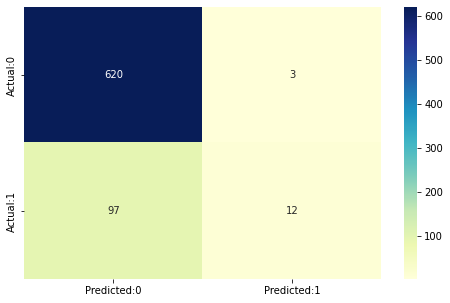

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_test_1,y_pred_1)
conf_matrix_1=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 620+12 = 632 correct predictions and 97+3= 100 incorrect ones.

True Positives: 12

True Negatives: 620

False Positives: 3 (Type I error)

False Negatives: 97 ( Type II error)

In [ ]:
TN_1=cm_1[0,0]
TP_1=cm_1[1,1]
FN_1=cm_1[1,0]
FP_1=cm_1[0,1]
sensitivity_1=TP_1/float(TP_1+FN_1)
specificity_1=TN_1/float(TN_1+FP_1)

In [ ]:
# Model Evaluation - Statistics
print('The acuuracy of the model = TP_1+TN_1/(TP_1+TN_1+FP_1+FN_1) = ',(TP_1+TN_1)/float(TP_1+TN_1+FP_1+FN_1),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP_1+TN_1)/float(TP_1+TN_1+FP_1+FN_1)),'\n',

'Sensitivity or True Positive Rate = TP_1/(TP_1+FN_1) = ',TP_1/float(TP_1+FN_1),'\n',

'Specificity or True Negative Rate = TN_1/(TN_1+FP_1) = ',TN_1/float(TN_1+FP_1),'\n',

'Positive Predictive value = TP_1/(TP_1+FP_1) = ',TP_1/float(TP_1+FP_1),'\n',

'Negative predictive Value = TN_1/(TN_1+FN_1) = ',TN_1/float(TN_1+FN_1),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',(TP_1/float(TP_1+FN_1))/(1-(TN_1/float(TN_1+FP_1))),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-(TP_1/float(TP_1+FN_1)))/(TN_1/float(TN_1+FP_1)))

The acuuracy of the model = TP_1+TN_1/(TP_1+TN_1+FP_1+FN_1) =  0.8633879781420765 
 The Missclassification = 1-Accuracy =  0.13661202185792354 
 Sensitivity or True Positive Rate = TP_1/(TP_1+FN_1) =  0.11009174311926606 
 Specificity or True Negative Rate = TN_1/(TN_1+FP_1) =  0.9951845906902087 
 Positive Predictive value = TP_1/(TP_1+FP_1) =  0.8 
 Negative predictive Value = TN_1/(TN_1+FN_1) =  0.8647140864714087 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  22.86238532110109 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.894214264575318


From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.

In [ ]:
y_pred_prob_1=logreg.predict_proba(x_test_1)[:,:]
y_pred_prob_df_1=pd.DataFrame(data=y_pred_prob_1, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df_1.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.932109,0.067891
1,0.979193,0.020807
2,0.807735,0.192265
3,0.810751,0.189249
4,0.898649,0.101351


Lower the threshold

Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2_1=0
    y_pred_prob_yes_1=logreg.predict_proba(x_test_1)
    y_pred2_1=binarize(y_pred_prob_yes_1)[:,1]
    cm2_1=confusion_matrix(y_test_1,y_pred2_1)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2_1,'\n',
            'with',cm2_1[0,0]+cm2_1[1,1],'correct predictions and',cm2_1[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2_1[1,1]/(float(cm2_1[1,1]+cm2_1[1,0])),'Specificity: ',cm2_1[0,0]/(float(cm2_1[0,0]+cm2_1[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[  0 623]
 [  0 109]] 
 with 109 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  
 [[  0 623]
 [  0 109]] 
 with 109 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.3 threshold the Confusion Matrix is  
 [[  0 623]
 [  0 109]] 
 with 109 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.4 threshold the Confusion Matrix is  
 [[  0 623]
 [  0 109]] 
 with 109 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 





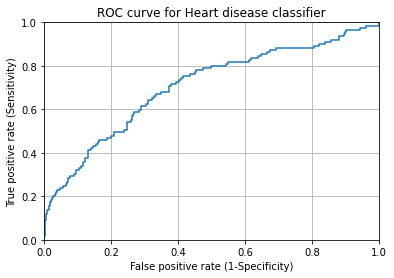

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_prob_yes_1[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

In [ ]:
# Area Under The Curve (AUC)
sklearn.metrics.roc_auc_score(y_test_1,y_pred_prob_yes_1[:,1])

0.7042131149955086

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

2) MLE 

In [ ]:
lr=LogisticRegression(max_iter=100,solver='lbfgs')
lr.fit(x_train_2,y_train_2)
lr_pred=lr.predict(x_test_2)
df_pred=pd.merge(x_test_2,pd.DataFrame(lr_pred,columns=['predicted']),left_index=True,right_index=True)

The predicted outcomes are added to the test dataset under the feature ‘predicted’.

In [ ]:
df_pred.head(5)

,age,male,cigsPerDay,totChol,sysBP,glucose,predicted
925,45,0,20.0,196.0,123.0,76.0,0
1226,38,0,9.0,160.0,102.5,68.0,0
2423,46,1,9.0,216.0,126.0,70.0,0
909,61,0,0.0,259.0,167.5,85.0,0
1302,63,0,0.0,226.0,172.5,81.0,0


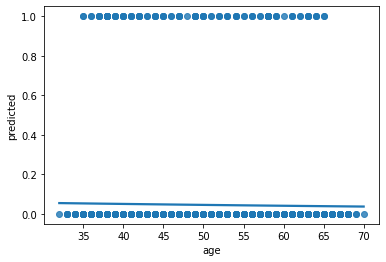

In [ ]:
sns.regplot(x="age", y='predicted',data=df_pred ,logistic=True, ci=None)

In the above plot which is between the feature age and prediction, the learner line is formed using the principle of maximum likelihood estimation which helped the Logistic regression model to classify the outcomes.

So, in the background algorithm picks a probability scaled by age of observing “1” and uses this to calculate the likelihood of observing “0”. This will do for all the data points and at last, it will multiply all those likelihoods of data given in the line. This process of multiplication will be continued until the maximum likelihood is not found or the best fit line is not found.

The maximum likelihood approach provides a persistent approach to parameter estimation as well as provides mathematical and optimizable properties. With a hands-on implementation of this concept in this article, we could understand how Maximum Likelihood Estimation works and how it is used as a backbone of logistic regression for classification.

4.	Explore the need of regularization and incorporate few relevant techniques for the problem statement

Regularization is one of the most important concepts of machine learning. It is a technique to prevent the model from overfitting by adding extra information to it. Sometimes the machine learning model performs well with the training data but does not perform well with the test data.

Techniques incorporated here:

**Dropout:**

Another most frequently used regularization technique is dropout. It essentially means that during the training, randomly selected neurons are turned off or ‘dropped’ out. It means that they are temporarily obstructed from influencing or activating the downward neuron in a forward pass, and none of the weights updates is applied on the backward pass.

E.g.: "education" attribute was dropout

**Early Stopping:**
It is a kind of cross-validation strategy where one part of the training set is used as a validation set, and the performance of the model is gauged against this set. So if the performance on this validation set gets worse, the training on the model is immediately stopped.

E.g. Attributes were selected on he CI score to ensure maximum accuracy
